Edgar Osvaldo Navarro García A01644488

# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [34]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [35]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [36]:
# url string that hosts our .csv file
url = "cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(Ruta + url)



# Exploring the content of the data set

Get a general 'feel' of the data


In [37]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
print (df.describe())


   ID   Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1  56.0      F            1       Y             1    62.0      61.0   
1   2  26.0      F            1       Y             1    62.0      60.0   
2   3  33.0      F            1       Y             1    66.0      64.0   
3   4  39.0      F            1       N             0    64.0      63.0   
4   5  27.0      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y            1.0      7  
1          70        Y            1.0      8  
2          85        Y            1.0      7  
3          87        Y            1.0     10  
4          72        N            0.0      4  
(52, 12)
Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')
ID                 int64
Age              float64
Gender            object


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [38]:
# Number of times that each distinct value of a variable occurs in a data set
df.value_counts()


ID  Age   Gender  GenderGroup  Glasses  GlassesGroup  Height  Wingspan  CWDistance  Complete  CompleteGroup  Score
1   56.0  F       1            Y        1             62.00   61.0      79          Y         1.0            7        1
26  28.0  M       2            N        0             75.00   76.0      111         Y         1.0            10       1
28  25.0  M       2            Y        1             76.00   73.0      107         Y         1.0            8        1
29  32.0  F       1            Y        1             63.00   60.0      75          Y         1.0            8        1
30  38.0  F       1            Y        1             61.50   61.0      78          Y         1.0            7        1
31  27.0  F       1            Y        1             62.00   60.0      72          Y         1.0            8        1
32  33.0  F       1            Y        1             65.30   64.0      91          Y         1.0            7        1
33  38.0  F       1            N        0    

In [39]:
# Proportion of each distinct value of a variable occurs in a data set
for col in df.columns:
    print(df[col].value_counts(normalize=True))



ID
1     0.019231
2     0.019231
29    0.019231
30    0.019231
31    0.019231
32    0.019231
33    0.019231
34    0.019231
35    0.019231
36    0.019231
37    0.019231
38    0.019231
39    0.019231
40    0.019231
41    0.019231
42    0.019231
43    0.019231
44    0.019231
45    0.019231
46    0.019231
47    0.019231
48    0.019231
49    0.019231
50    0.019231
51    0.019231
28    0.019231
27    0.019231
26    0.019231
13    0.019231
3     0.019231
4     0.019231
5     0.019231
6     0.019231
7     0.019231
8     0.019231
9     0.019231
10    0.019231
11    0.019231
12    0.019231
14    0.019231
25    0.019231
15    0.019231
16    0.019231
17    0.019231
18    0.019231
19    0.019231
20    0.019231
21    0.019231
22    0.019231
23    0.019231
24    0.019231
52    0.019231
Name: proportion, dtype: float64
Age
26.0    0.137255
27.0    0.137255
24.0    0.098039
28.0    0.098039
23.0    0.098039
30.0    0.078431
25.0    0.078431
33.0    0.058824
39.0    0.039216
29.0    0.039216
31.0    0.

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [40]:
# Total number of observations
print("Observaciones")
print(df.shape[0])


# total number of null observations in Age
print("Observaciones nulas en Age")
print(df['Age'].isnull().sum())


# Total number of counts in Age (excluding missing values)
print("Observaciones no nulas en Age")
print(df['Age'].count())



Observaciones
52
Observaciones nulas en Age
1
Observaciones no nulas en Age
51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

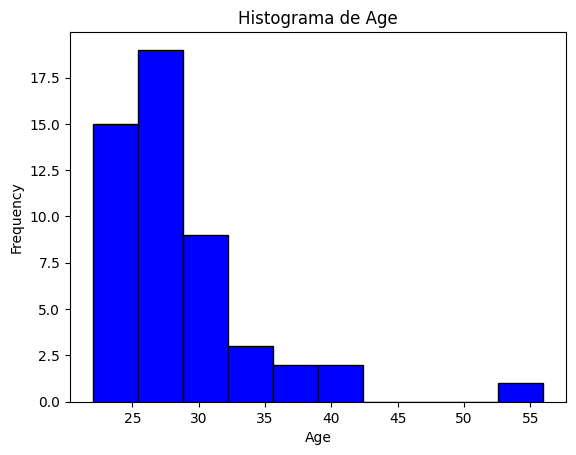

In [41]:
# Plot histogram of Age
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

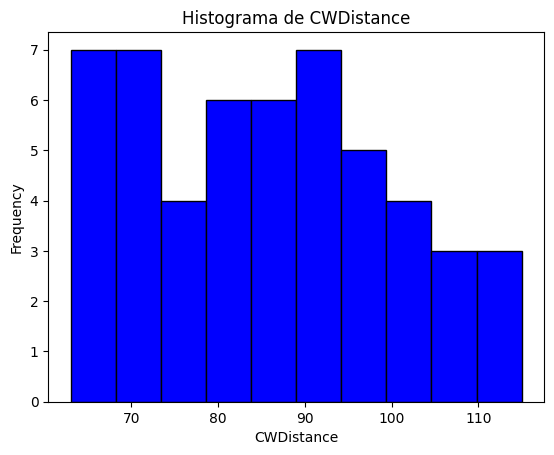

In [42]:
# Plot distribution of CWDistance
plt.hist(df['CWDistance'], bins=10, color='blue', edgecolor='black')
plt.title('Histograma de CWDistance')
plt.xlabel('CWDistance')
plt.ylabel('Frequency')
plt.show()


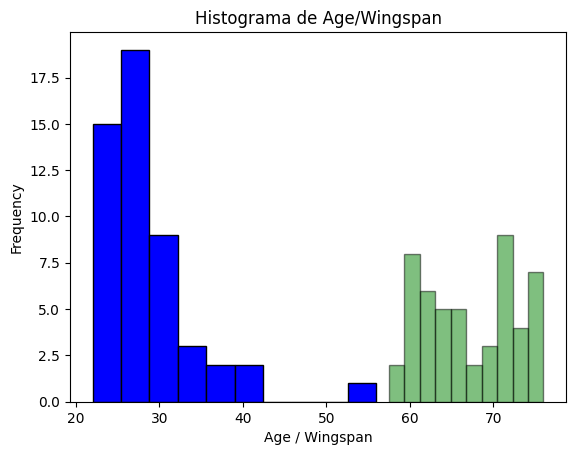

In [43]:
# Plot histogram of both the Age and the Wingspan
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')
plt.hist(df['Wingspan'], bins=10, color='green', edgecolor='black', alpha=0.5)
plt.title('Histograma de Age/Wingspan')
plt.xlabel('Age / Wingspan')
plt.ylabel('Frequency')
plt.show()


# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

Text(0.5, 1.0, 'Histograma de Height/Wingspan')

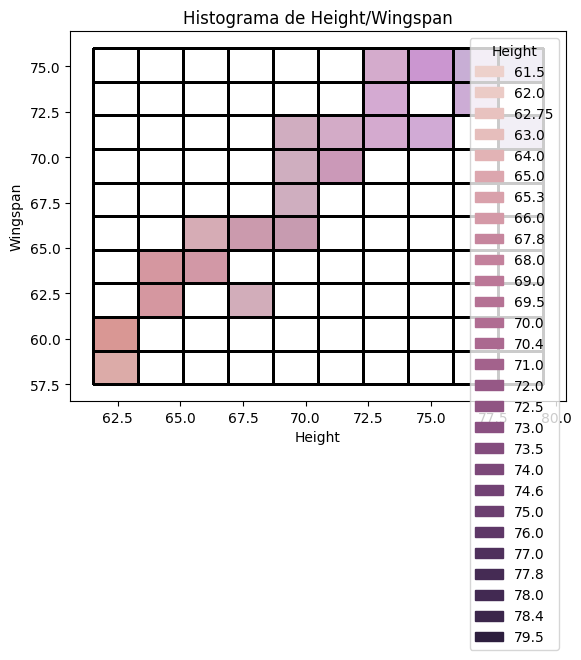

In [73]:

sns.histplot(data = df,x='Height', y='Wingspan', hue='Height', bins=10, color='blue', edgecolor='black')
plt.title('Histograma de Height/Wingspan')


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

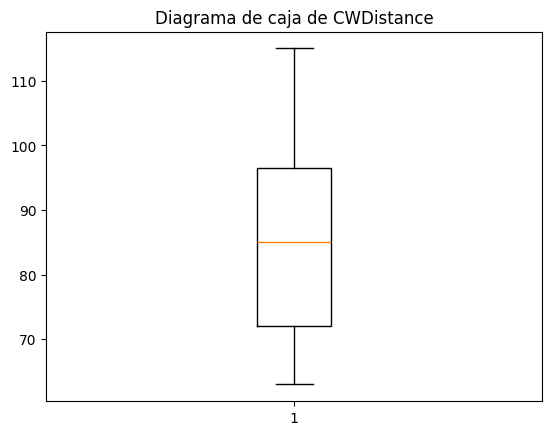

In [44]:
# Create the boxplot of the "CWDistance"
plt.boxplot(df['CWDistance'], vert=True)
plt.title('Diagrama de caja de CWDistance')
plt.show()


Text(0.5, 1.0, 'Diagrama de caja de Height')

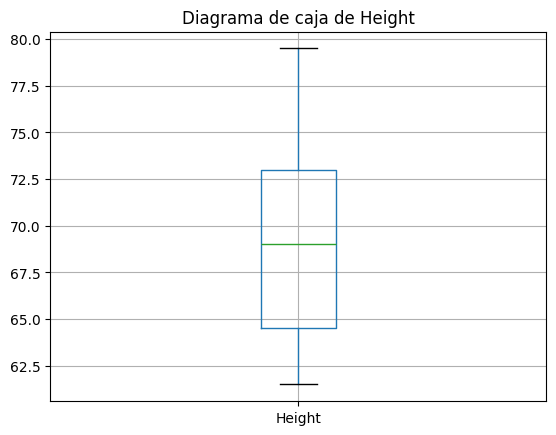

In [62]:
# Create the boxplot of the "Height"
df.boxplot('Height')
plt.title('Diagrama de caja de Height')

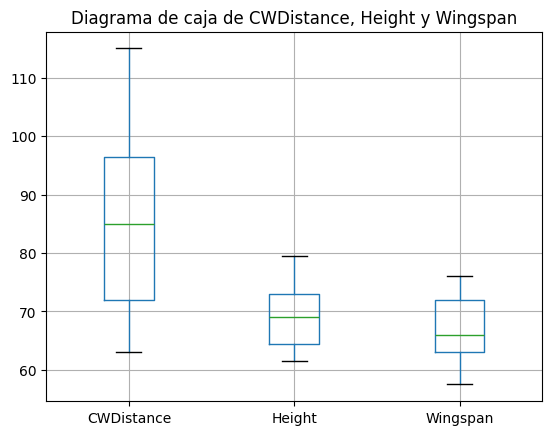

In [63]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
df.boxplot(['CWDistance', 'Height', 'Wingspan'])
plt.title('Diagrama de caja de CWDistance, Height y Wingspan')
plt.show()


Text(0.5, 1.0, 'Diagrama de caja de CWDistance y Wingspan')

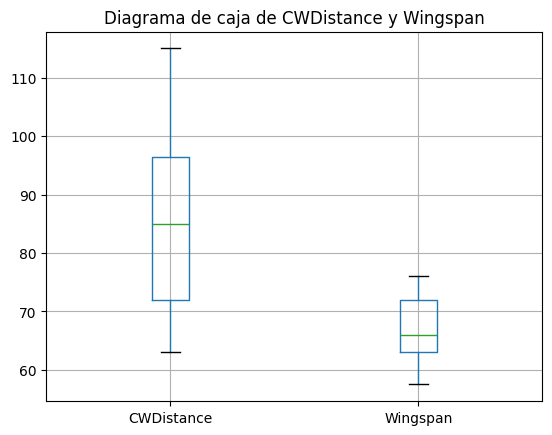

In [64]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"
df.boxplot(['CWDistance', 'Wingspan'])
plt.title('Diagrama de caja de CWDistance y Wingspan')


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='CWDistance'>

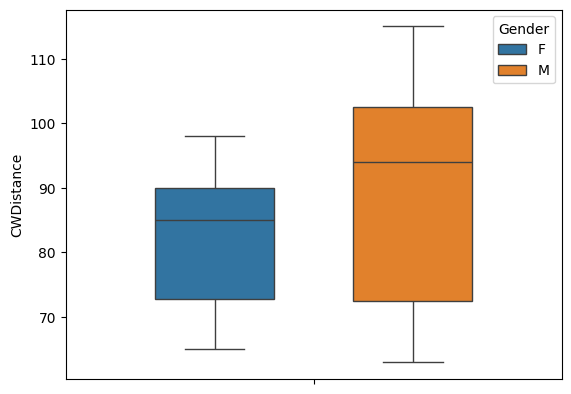

In [65]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)



<Axes: xlabel='Glasses', ylabel='Height'>

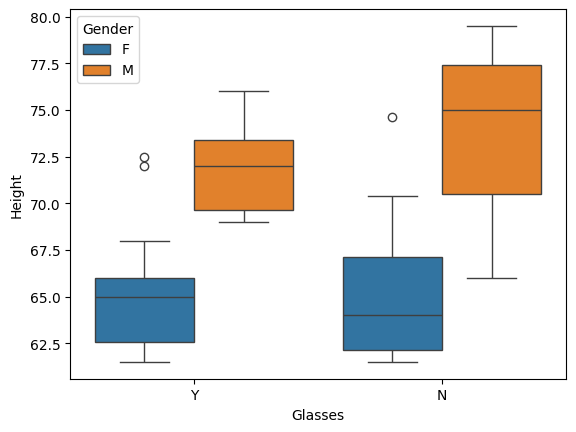

In [66]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


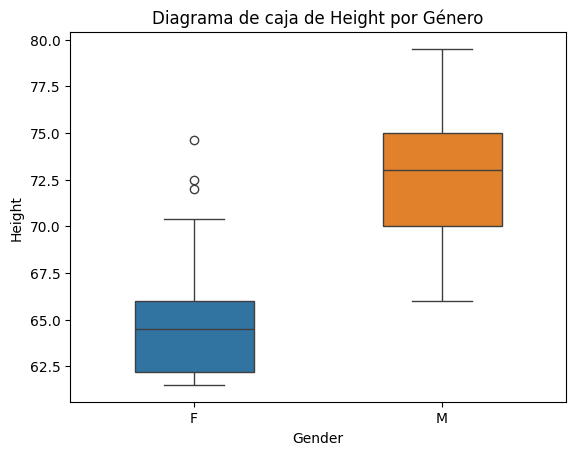

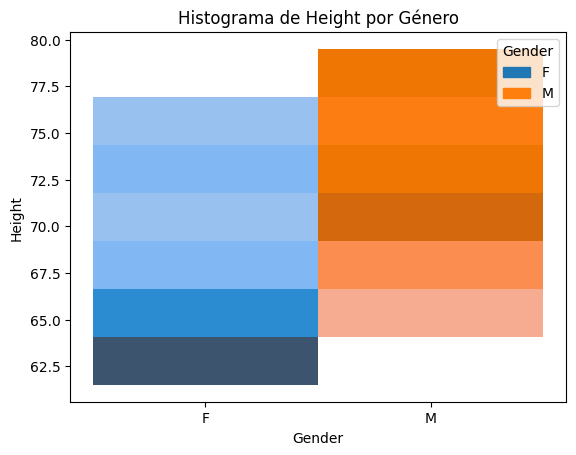

In [69]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
sns.boxplot(data=df, y='Height', x='Gender', hue='Gender', gap=.4)
plt.title('Diagrama de caja de Height por Género')
plt.show()
sns.histplot(data=df, y='Height', x= 'Gender', hue='Gender', multiple='stack')
plt.title('Histograma de Height por Género')
plt.show()


# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

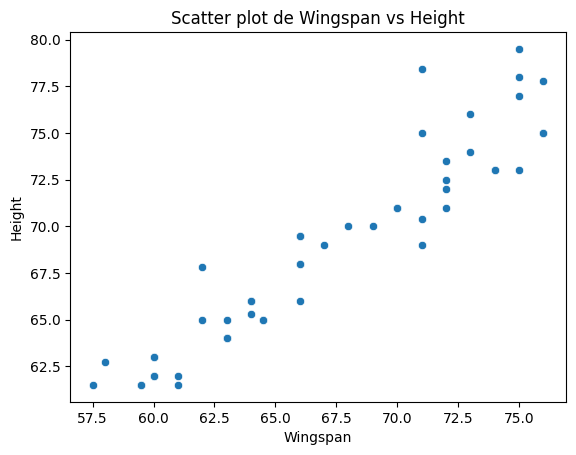

In [76]:
# scatter plot between two variables
sns.scatterplot(data=df, x='Wingspan', y='Height')
plt.title('Scatter plot de Wingspan vs Height')
plt.show()


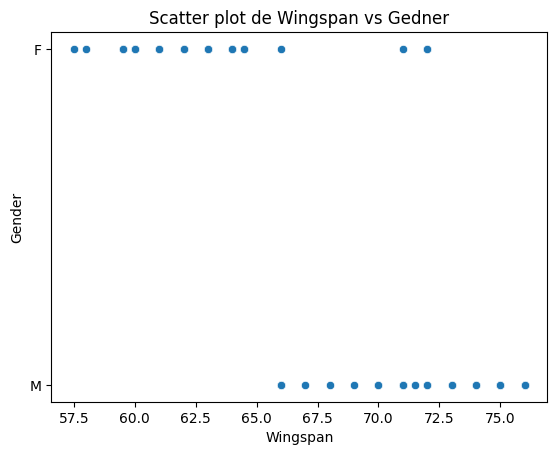

In [77]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x='Wingspan', y= 'Gender')
plt.title('Scatter plot de Wingspan vs Gedner')
plt.show()


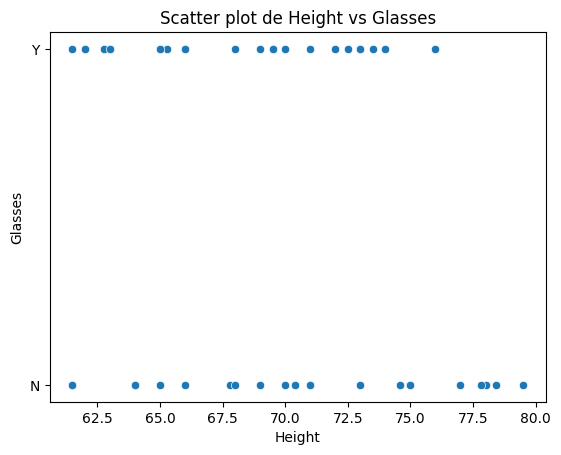

In [78]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x='Height', y= 'Glasses')
plt.title('Scatter plot de Height vs Glasses')
plt.show()

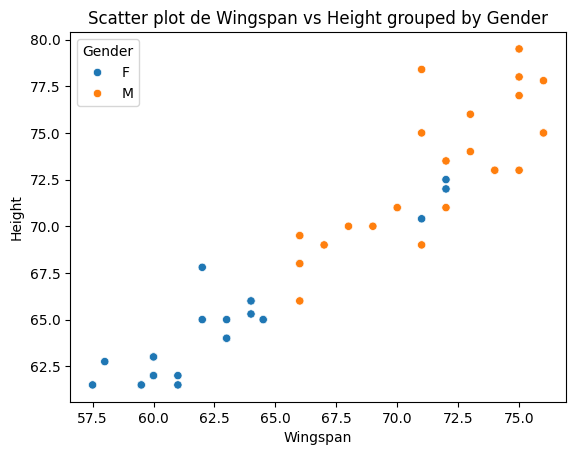

In [82]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data=df, x='Wingspan', y='Height', hue='Gender')
plt.title('Scatter plot de Wingspan vs Height grouped by Gender')
plt.show()

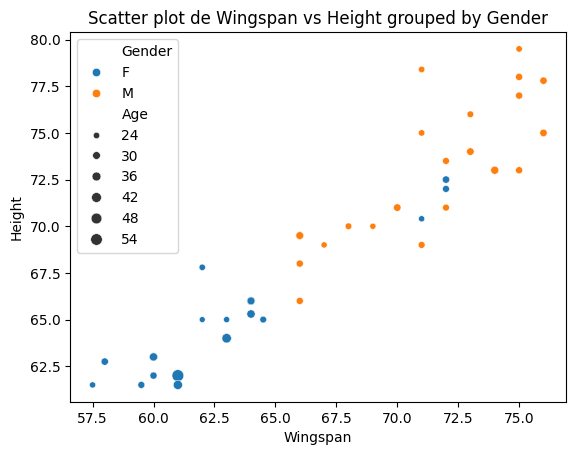

In [83]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(data=df, x='Wingspan', y='Height', hue='Gender', size='Age')
plt.title('Scatter plot de Wingspan vs Height grouped by Gender')
plt.show()


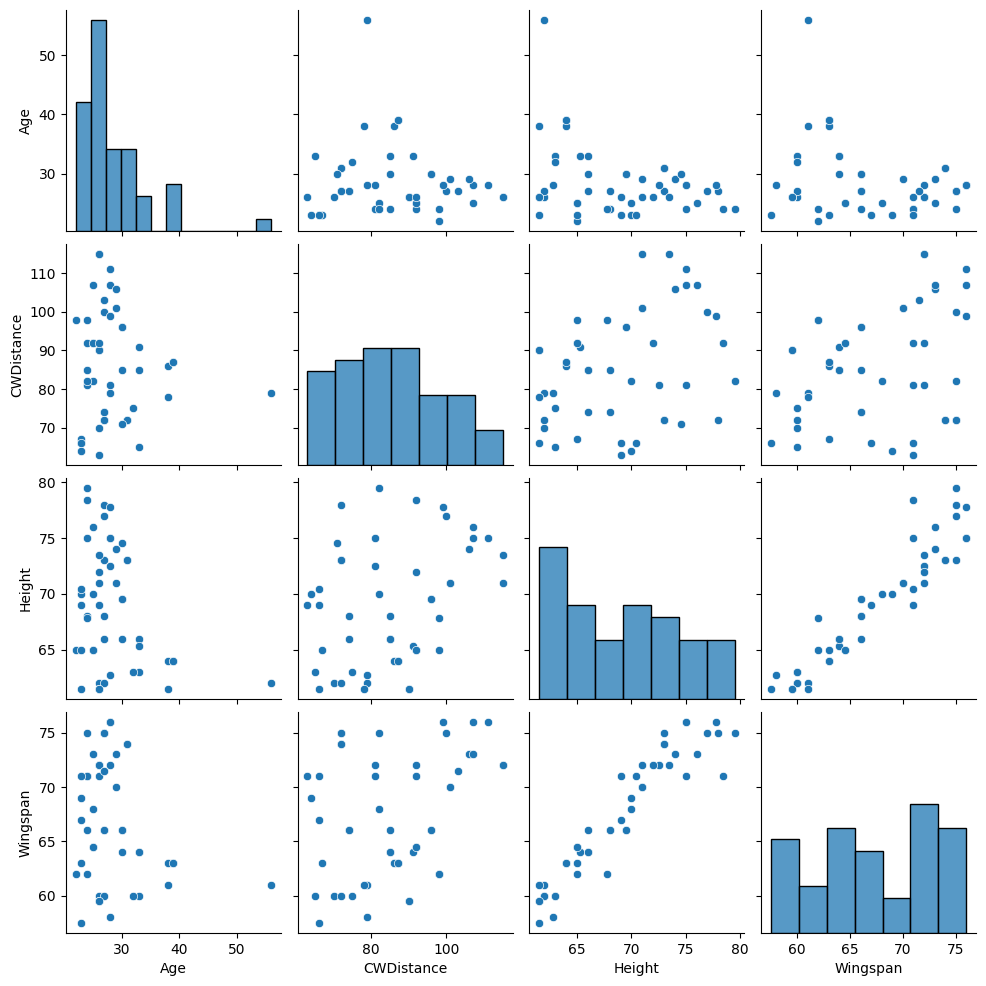

In [85]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'
sns.pairplot(df[['Age','CWDistance','Height','Wingspan']])
plt.show()



# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables
El largo del sepal tiene valores que van desde el 4.3 cm hasta el 7.9 cm, siendo de 5.5 a 6.5 donde se encuentran la mayoria de los sepales. En cuanto al ancho del sepal este varia entre 2 cm hasta 4.4 cm teniendo un promedio de 3.054. Por lo tanto se puede observar que usualmente el largo de sepal es casi el doble de largo que el ancho del sepal. El largo del petalo tiene un minimo de 1 cm y un maximo de 6.9 cm, en las graficas podemos observar como es que existe una cantidad considerable de plantas con altua de 1-2 cm, pero la mayor concentración esta entre 4- 5 cm. En cuanto al ancho del petalo se puede observar una gran variedad de anchos variando desde 0.1 cm hasta 2.5 cm, pero estos parecen estar distribuidos de forma casi aleatoria teniando un promedio de 1.19 cm y una desviación estandar de 0.76.